In [1]:
import sys
main_path = "../.."
sys.path.append(main_path)

import numpy as np
import pandas as pd
from impyute.imputation.cs import fast_knn
import os
import yaml
import copy
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from src.scripts.clustering_algorithm import Clustering
import seaborn as sns
from src.scripts.common_figures import Figures
import itertools


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/shap/utils/_clustering.py:34: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/shap/utils/_clustering.py:53: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/Library/Frameworks/Python.framework/Versi

In [2]:
clustering = Clustering()
figures = Figures()

In [3]:
df_path = f"{main_path}/data/processed/dataframes"

cdt_di_fi_ohe = pd.read_csv(f"{df_path}/cdt_di_fi_ohe.csv")
level_of_cancer = pd.read_csv(f"{df_path}/level_of_cancer.csv").values.ravel()

In [4]:
labels = ["T1", "T2", "T3", "T4"]


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


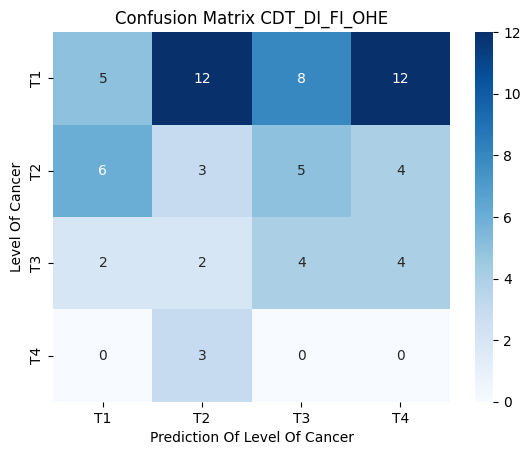

In [5]:
save_k_means = f"{main_path}/figures/paper_figures/png/clustering_k_means_CDT_DI_FI_OHE_confusion_matrix.png"

metric_score_k_means = clustering.k_means_clustering(cdt_di_fi_ohe.values[0:70], level_of_cancer, labels, save_k_means)



invalid value encountered in double_scalars
invalid value encountered in double_scalars


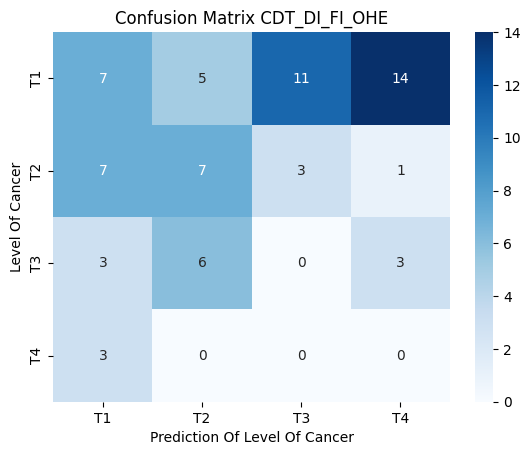

In [6]:
save_gmm_clustering = f"{main_path}/figures/paper_figures/png/clustering_gmm_CDT_DI_FI_OHE_confusion_matrix.png"

metric_score_gmm = clustering.gmm_clustering(cdt_di_fi_ohe.values[0:70], level_of_cancer, labels, save_gmm_clustering)


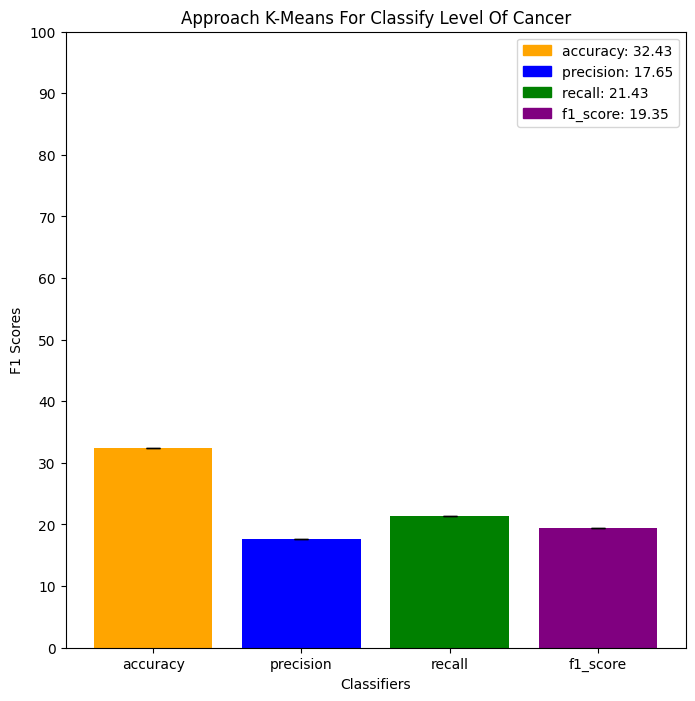

In [7]:
save_k_means_scores = f"{main_path}/figures/paper_figures/png/clustering_k_means_CDT_DI_FI_OHE_scores.png"
paper_figures_k_means_scores = f"{main_path}/figures/paper_figures/svg/clustering_k_means_CDT_DI_FI_OHE_scores.png"

class_names = {'cdt_di_fi_ohe':'Approach K-Means For Classify Level Of Cancer'}

classifier_names = ['accuracy', 'precision', 'recall', 'f1_score']

scores = { 'cdt_di_fi_ohe':[metric_score_k_means[i.lower()] for i in classifier_names]}
figures.draw_bar_plot(classifier_names, scores, class_names, grid_shape=(1, 1), save=save_k_means_scores, paper_figure=paper_figures_k_means_scores)


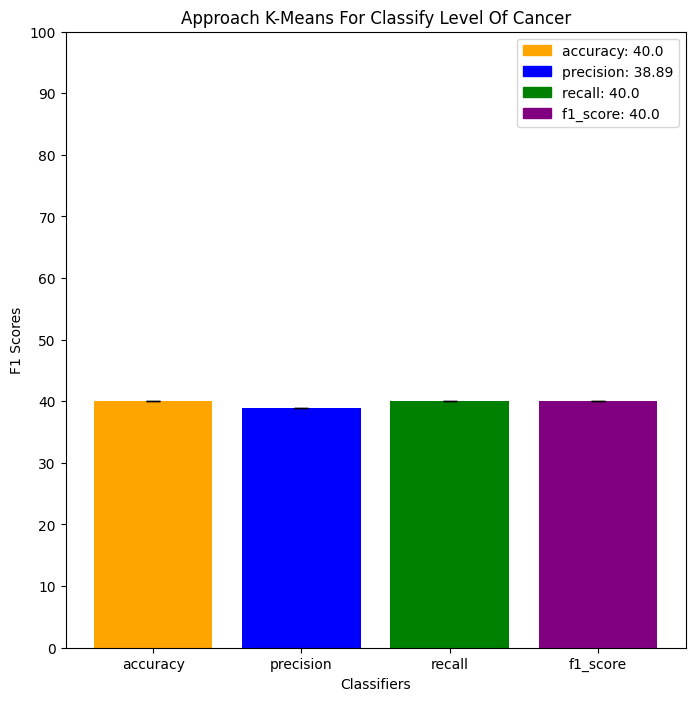

In [8]:
save_gmm_clustering_scores = f"{main_path}/figures/paper_figures/png/clustering_gmm_CDT_DI_FI_OHE_scores.png"
paper_figures_gmm_clustering_scores = f"{main_path}/figures/paper_figures/svg/clustering_gmm_CDT_DI_FI_OHE_confusion_scores.png"

class_names = {'cdt_di_fi_ohe':'Approach K-Means For Classify Level Of Cancer'}

classifier_names = ['accuracy', 'precision', 'recall', 'f1_score']

scores = { 'cdt_di_fi_ohe':[metric_score_gmm[i.lower()] for i in classifier_names]}
figures.draw_bar_plot(classifier_names, scores, class_names, grid_shape=(1, 1), save=save_gmm_clustering_scores, paper_figure=paper_figures_gmm_clustering_scores)
